# IMPORT LIBS

In [292]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import scipy.stats as stats
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
from numpy import arange
import matplotlib.pyplot as plt
import random
from statistics import mean
from pandas import read_csv
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV

import pandas_datareader as pdr
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from pandas.plotting import autocorrelation_plot
import seaborn as sns
import math
sns.set_style("whitegrid")

from sklearn.preprocessing import MinMaxScaler 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

from matplotlib.widgets import Slider

from fast_ml.model_development import train_valid_test_split
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import explained_variance_score, mean_poisson_deviance, mean_gamma_deviance
from sklearn.metrics import r2_score
from sklearn.metrics import max_error

from sklearn.metrics import mean_absolute_percentage_error

from statistics import NormalDist

In [293]:


def confidence_interval(data, confidence=0.95):
  dist = NormalDist.from_samples(data)
  z = NormalDist().inv_cdf((1 + confidence) / 2.)
  h = dist.stdev * z / ((len(data) - 1) ** .5)
  return dist.mean - h, dist.mean + h


In [294]:
def quantile_score (test_Y,yhat_probs):
    x=np.mean(test_Y.reshape(-1,1))
    y=np.mean(yhat_probs)
    if x>=y:
        return 2*(0.6)*(x-y)
    else:
        return 2*(0.4)*(y-x)
    


In [295]:
def qj2(test_Y,yhat_probs,y_train):
    x=np.mean(test_Y.reshape(-1,1))
    y=np.mean(yhat_probs)
    ej= (x-y)**2
    T= len(y_train)
    running=0
    for i in range(2,T):
        running+= abs((y_train[i] - y_train[i-1])**2)
    denom= (1/(T-1))*running
    return (ej/denom)

def qj(test_Y,yhat_probs,y_train):
    x=np.mean(test_Y.reshape(-1,1))
    y=np.mean(yhat_probs)
    ej= x-y
    T= len(y_train)
    running=0
    for i in range(2,T):
        running+= abs(y_train[i] - y_train[i-1])
    denom= (1/(T-1))*running
    return abs(ej/denom)

## Loading the sample data for AAA ETF

In [296]:
df = pd.read_csv("data.csv")
df=df[df['fund_symbol']=='AAA']
df.set_index("price_date", inplace=True)
print(df.shape)
df.head()

(310, 7)


,fund_symbol,open,high,low,close,adj_close,volume
price_date,,,,,,,
2020-09-09,AAA,25.10,25.12,25.07,25.07,24.85,17300
2020-09-10,AAA,25.06,25.07,25.05,25.07,24.85,23500
2020-09-11,AAA,25.04,25.05,25.02,25.03,24.81,33400
2020-09-14,AAA,25.01,25.06,25.01,25.02,24.80,13100
2020-09-15,AAA,25.02,25.03,25.01,25.01,24.79,12100


# METRICS

1. Mean absolute error (MAE) and Root mean squared error (RMSE)
2. Symmetric MAPE (sMAPE)
3. Forecast error (the difference between an observed value and its forecast)
4. Quantile Score (similar to an absolute error)
5. precision, recall, F1 score, ROC, accuracy
5. Confusion Matrix
6. Plot cumulative returns of actual vs predicted for each machine learning model implemented

In [297]:
df_Metrics = pd.DataFrame(columns=['model'])
df_Metrics.head()

,model


# RF

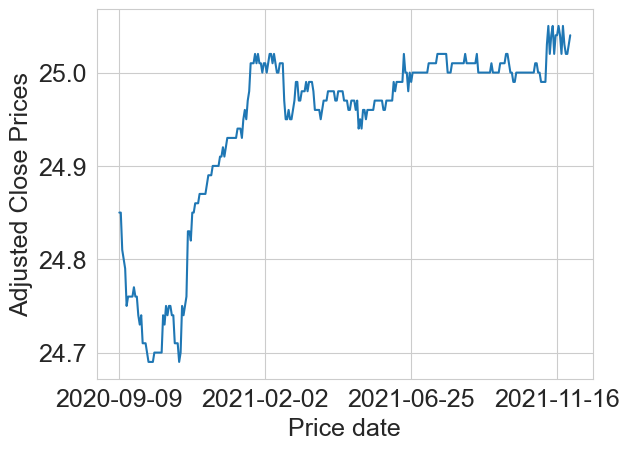

<Figure size 2600x2800 with 0 Axes>

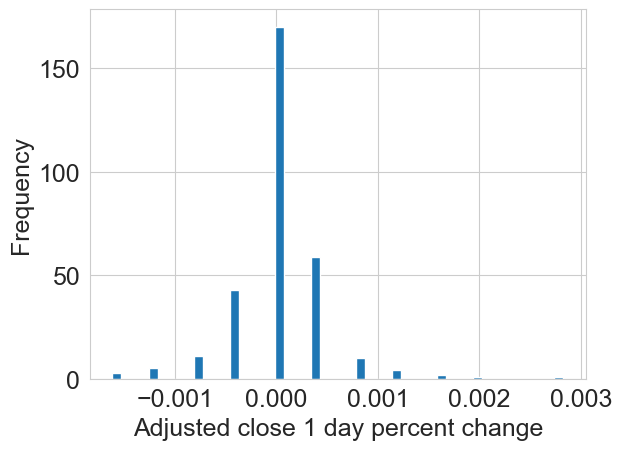

In [298]:
df['adj_close'].plot()
plt.xlabel("Price date")
plt.ylabel("Adjusted Close Prices")
plt.figure(figsize=(26,28))
plt.show()


df['adj_close'].pct_change().plot.hist(bins=50)
plt.xlabel("Adjusted close 1 day percent change")
plt.show()

In [299]:
x = df.iloc[:, 1:3].values
y = df.iloc[:, 4].values
#x = np.array(df[['open','high','low','close']].values.tolist())
#y = np.array(df[['adj_close']].values.tolist())

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,  random_state=0)



In [300]:
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)



In [301]:
# model = RandomForestRegressor(n_estimators=500, random_state=42, min_samples_split=2, min_samples_leaf=1, max_depth=10, bootstrap=True)
model = RandomForestRegressor(n_estimators=10000, random_state=100,bootstrap=True)
model.fit(x_train, y_train)
predict = model.predict(x_test)
print(predict)



[25.05832775 25.05832775 25.03294252 25.01127174 25.03000299 25.00567189
 24.90460063 25.01127174 25.00567189 25.01127174 25.03024556 25.05832775
 25.00567189 24.98746563 25.08618668 25.04599712 25.00567189 25.07470164
 24.99926734 25.00567189 24.96291834 25.00567189 24.94985283 25.14468777
 25.00567189 24.9100404  24.99499164 25.00999825 25.01127174 25.1548786
 25.14468777 25.07634551 24.99926734 25.05832775 25.08484616 25.08746065
 25.07623585 25.01127174 25.03130922 25.04599712 25.05832775 25.12718742
 24.98746563 25.06856867 25.00567189 24.9100404  25.01127174 24.98746563
 25.05832775 25.04599712 25.01127174 25.05832775 24.99926734 25.00567189
 24.99499164 24.96291834 25.05239972 25.03000299 25.0199327  24.94979758
 25.00567189 24.94979758]


In [302]:
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, predict), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, predict), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, predict)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, predict), 4))
print(f'Train Score : {model.score(x_train, y_train) * 100:.2f}% and Test Score : {model.score(x_test, y_test) * 100:.2f}% using Random Tree Regressor.')
errors = abs(predict - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Mean Absolute Error: 0.0069
Mean Squared Error: 0.0001
Root Mean Squared Error: 0.0087
(R^2) Score: 0.9707
Train Score : 98.40% and Test Score : 97.07% using Random Tree Regressor.
Accuracy: 99.97 %.


In [303]:
from statistics import mean
mae_score=mean(qj(y_test.reshape(-1,1), predict ,y_train.reshape(-1,1)))
rmse=(mean(qj2(y_test.reshape(-1,1), predict ,y_train.reshape(-1,1))))**0.5
#rmse = np.sqrt(np.mean(predict - y_test)**2)
#mae_score=mae(y_test, predict)
#smape=0
#fore=np.mean(y_test-predict)
#quan= quantile_score (y_test,predict)
df_Metrics = df_Metrics[df_Metrics.model != "RF"]
#var = explained_variance_score(y_test.reshape(-1,1), predict)

#r2 = r2_score(y_test.reshape(-1,1), predict)


#var2 = max_error(y_test.reshape(-1,1),predict)

#mape=mean_absolute_percentage_error(y_test.reshape(-1,1), predict)

df_Metrics=df_Metrics.append({'model': 'RF',
                   'MASE': mae_score,
                   'RMSSE':rmse
                  }, ignore_index=True)
#metrics={'RF', mae, rsme,smape,fore,quan,precision,recall,f1,roc,accuracy}
#df_Metrics.insert('RF', mae, rsme,smape,fore,quan,precision,recall,f1,roc,accuracy)

In [304]:
df_Metrics.head()

,model,MASE,RMSSE
0,RF,0.001349,0.001053


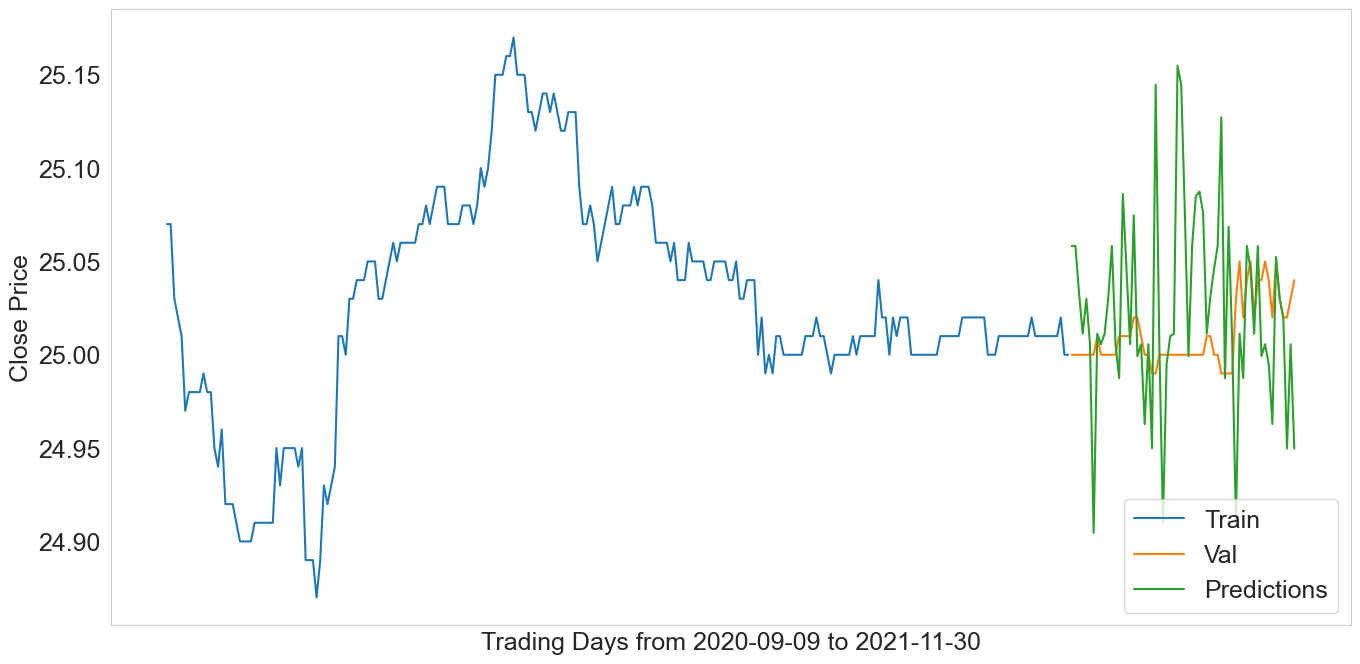

In [305]:
data = df.filter(['close'])
train = data[:len(x_train)]

validation = data[len(x_train):]
validation['Predictions'] = predict
plt.figure(figsize=(16,8))
plt.xticks([])
#plt.rcParams.update({'font.size': 10})
SMALL_SIZE = 18
MEDIUM_SIZE = 18
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) 
#plt.xticks(np.arange(train, max(train)+1, 1.0))
#plt.title('RF')
plt.grid(b=None)
plt.xlabel('Trading Days from 2020-09-09 to 2021-11-30')
plt.ylabel('Close Price')
plt.plot(train)
plt.plot(validation[['close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.savefig('RFval.pdf', format="pdf", bbox_inches="tight")
plt.show()

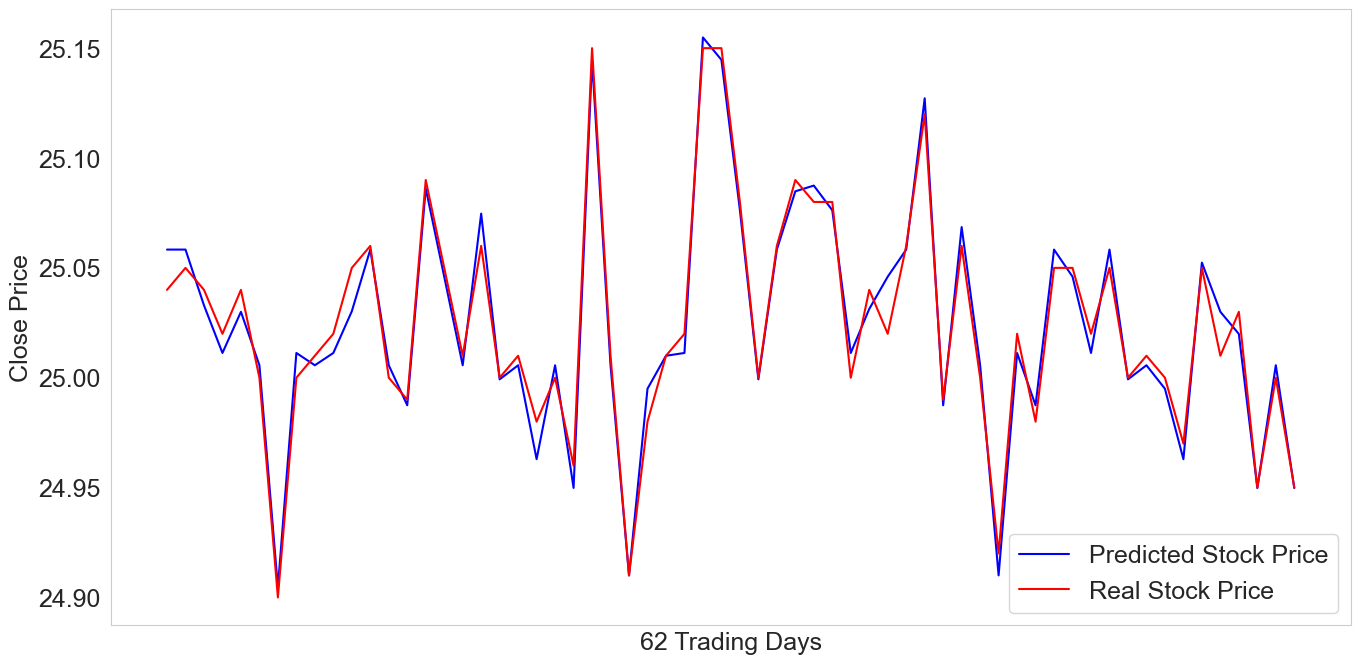

In [306]:
plt.figure(figsize=(16,8))
predicted  = predict.reshape(-1,1)
test_label = y_test.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(x_train)
plt.axes().set_facecolor("white")
'''for j in range(len_t , len_t + len(x_train)):
    if not (j>=310):
        temp = df.iloc[j,3]
        if not (j-len_t)==62:
            test_label[j - len_t] = test_label[j - len_t] * temp + temp
            predicted[j - len_t] = predicted[j - len_t] * temp + temp'''
plt.plot(predicted, color = 'blue', label = 'Predicted Stock Price')
plt.plot(test_label, color = 'red', label = 'Real Stock Price')
SMALL_SIZE = 10
MEDIUM_SIZE = 10
BIGGER_SIZE = 10

#plt.title(' Stock Price Prediction')
plt.xticks([])
plt.grid(b=None)

#plt.title('RF')
#plt.text(45, 10, "Confidence Interval\n(25.01, 25.04)", fontsize=12)
plt.xlabel('62 Trading Days')
plt.ylabel('Close Price')

plt.legend(frameon = 1).get_frame().set_facecolor('white')
plt.legend(loc='lower right')
plt.savefig('RF train.pdf', format="pdf", bbox_inches="tight")

plt.show()


In [307]:
print(predict.mean())
print(y_test.mean())
print(stats.ttest_rel(a=test_label,b= predicted))
print(np.array(stats.ttest_rel(a=test_label.reshape(-1,1),b= predict)[1]).mean())
#print(stats.ttest_rel(a=test_label.reshape(-1,1),b= predict))

25.02410767113318
25.024193548387096
Ttest_relResult(statistic=array([0.07700929]), pvalue=array([0.93886819]))
0.041067547637352333


In [308]:
import numpy as np 
from scipy.stats import t
x = predicted
m = x.mean() 
s = x.std() 
dof = len(x)-1 
confidence = 0.95
t_crit=np.abs(t.ppf((1-confidence)/2,dof))
print((m-s*t_crit/np.sqrt(len(x)), m+s*t_crit/np.sqrt(len(x)))) 

(25.010978665329684, 25.037236676936676)


In [309]:

predictions = pd.DataFrame({"Predictions": predict}, index=pd.date_range(start=df.index[-1], periods=len(predict), freq="D"))
predictions.to_csv("Predicted-price-data.csv")
#colllects future days from predicted values
oneyear_df = pd.DataFrame(predictions[:252])
oneyear_df.to_csv("one-year-predictions.csv")
twomonth_df = pd.DataFrame(predictions[:42])
twomonth_df.to_csv("two-month-predictions.csv")
fivedays_df = pd.DataFrame(predictions[:5])
fivedays_df.to_csv("five-days-predictions.csv")

Buy price and date
            Predictions
Unnamed: 0             
2021-12-06    24.904601
Sell price and date
            Predictions
Unnamed: 0             
2021-12-29    25.154879


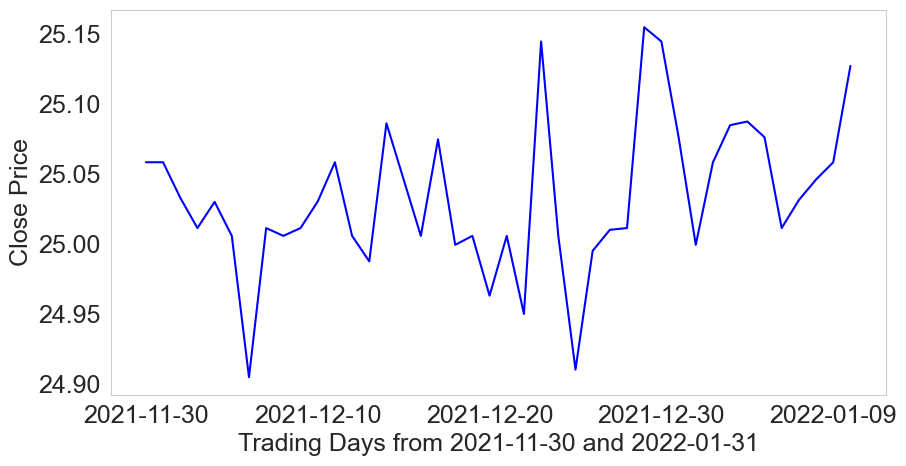

In [310]:
oneyear_df_pred = pd.read_csv("two-month-predictions.csv")
oneyear_df_pred.head()
plt.figure(figsize=(16,8))
oneyear_df_pred.set_index("Unnamed: 0", inplace=True)
buy_price = min(oneyear_df_pred["Predictions"])
sell_price = max(oneyear_df_pred["Predictions"])
oneyear_buy = oneyear_df_pred.loc[oneyear_df_pred["Predictions"] == buy_price]
oneyear_sell = oneyear_df_pred.loc[oneyear_df_pred["Predictions"] == sell_price]
print("Buy price and date")
print(oneyear_buy)
print("Sell price and date")
print(oneyear_sell)
oneyear_df_pred["Predictions"].plot(figsize=(10, 5), title="Forecast for the next 2 months", color="blue")
#plt.xticks([])
plt.grid(b=None)

plt.title('')
plt.xlabel('Trading Days from 2021-11-30 and 2022-01-31')
plt.ylabel('Close Price')
#plt.legend()
plt.savefig('RF pred.pdf', format="pdf", bbox_inches="tight")
plt.show()






# LSTM

In [311]:
df = pd.read_csv("data.csv")
df=df[df['fund_symbol']=='AAA']
df.set_index("price_date", inplace=True)
df.head()

,fund_symbol,open,high,low,close,adj_close,volume
price_date,,,,,,,
2020-09-09,AAA,25.10,25.12,25.07,25.07,24.85,17300
2020-09-10,AAA,25.06,25.07,25.05,25.07,24.85,23500
2020-09-11,AAA,25.04,25.05,25.02,25.03,24.81,33400
2020-09-14,AAA,25.01,25.06,25.01,25.02,24.80,13100
2020-09-15,AAA,25.02,25.03,25.01,25.01,24.79,12100


In [312]:
stock_data=df

In [313]:
close_prices = stock_data['close']
values = close_prices.values
training_data_len = math.ceil(len(values)* 0.8)

#scaler = MinMaxScaler(feature_range=(0,1))
scaler=StandardScaler()
scaled_data = scaler.fit_transform(values.reshape(-1,1))
train_data = scaled_data[0: training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


In [314]:
test_data = scaled_data[training_data_len-60: , : ]
x_test = []
y_test = values[training_data_len:]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [315]:
model = keras.Sequential()
model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(layers.LSTM(100, return_sequences=False))
model.add(layers.Dense(25))
model.add(layers.Dense(1))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 60, 100)           40800     
                                                                 
 lstm_5 (LSTM)               (None, 100)               80400     
                                                                 
 dense_6 (Dense)             (None, 25)                2525      
                                                                 
 dense_7 (Dense)             (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________


In [316]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size= 1, epochs=3)
predictions = model.predict(x_test)
print(predictions.shape)
predictions = scaler.inverse_transform(predictions)

Epoch 1/3
188/188 [==============================] - 9s 35ms/step - loss: 0.1376
Epoch 2/3
188/188 [==============================] - 7s 39ms/step - loss: 0.0834
Epoch 3/3
2/2 [==============================] - 2s 102ms/step
(62, 1)


In [317]:
from statistics import mean
mae_score=mean(qj(y_test.reshape(-1,1), predictions ,y_train.reshape(-1,1)))
rmse=(mean(qj2(y_test.reshape(-1,1), predictions ,y_train.reshape(-1,1))))**0.5
#rmse = np.sqrt(np.mean(predict - y_test)**2)
#mae_score=mae(y_test, predict)
#smape=0
#fore=np.mean(y_test-predict)
#quan= quantile_score (y_test,predict)
df_Metrics = df_Metrics[df_Metrics.model != "LSTM"]
#var = explained_variance_score(y_test.reshape(-1,1), predict)

#r2 = r2_score(y_test.reshape(-1,1), predict)


#var2 = max_error(y_test.reshape(-1,1),predict)

#mape=mean_absolute_percentage_error(y_test.reshape(-1,1), predict)

df_Metrics=df_Metrics.append({'model': 'LSTM',
                   'MASE': mae_score,
                   'RMSSE':rmse
                  }, ignore_index=True)
#metrics={'RF', mae, rsme,smape,fore,quan,precision,recall,f1,roc,accuracy}
#df_Metrics.insert('RF', mae, rsme,smape,fore,quan,precision,recall,f1,roc,accuracy)

In [318]:
'''
rmse = np.sqrt(np.mean(predictions - y_test)**2)

mae_score=mae(y_test, predictions)
smape=0
fore=np.mean(y_test-predictions)
quan= quantile_score (y_test,predictions)
df_Metrics = df_Metrics[df_Metrics['model'] != "LSTM"]
var = explained_variance_score(y_test.reshape(-1,1), predictions)

r2 = r2_score(y_test.reshape(-1,1), predictions)


var2 = max_error(y_test.reshape(-1,1),predictions)

mape=mean_absolute_percentage_error(y_test.reshape(-1,1), predictions)
df_Metrics=df_Metrics.append({'model': 'LSTM',
                   'MAE': mae_score,
                   'RMSE':rmse,'R^2':r2,
                    'explained_variance_score':var,
                   'FORECAST ERROR':fore,
                    'QUANTILE ERROR':quan,
                    'MAPE':mape,
                   'MAX ERROR':var2
                  }, ignore_index=True)
#metrics={'RF', mae, rsme,smape,fore,quan,precision,recall,f1,roc,accuracy}
#df_Metrics.insert('RF', mae, rsme,smape,fore,quan,precision,recall,f1,roc,accuracy)'''

'\nrmse = np.sqrt(np.mean(predictions - y_test)**2)\n\nmae_score=mae(y_test, predictions)\nsmape=0\nfore=np.mean(y_test-predictions)\nquan= quantile_score (y_test,predictions)\ndf_Metrics = df_Metrics[df_Metrics[\'model\'] != "LSTM"]\nvar = explained_variance_score(y_test.reshape(-1,1), predictions)\n\nr2 = r2_score(y_test.reshape(-1,1), predictions)\n\n\nvar2 = max_error(y_test.reshape(-1,1),predictions)\n\nmape=mean_absolute_percentage_error(y_test.reshape(-1,1), predictions)\ndf_Metrics=df_Metrics.append({\'model\': \'LSTM\',\n                   \'MAE\': mae_score,\n                   \'RMSE\':rmse,\'R^2\':r2,\n                    \'explained_variance_score\':var,\n                   \'FORECAST ERROR\':fore,\n                    \'QUANTILE ERROR\':quan,\n                    \'MAPE\':mape,\n                   \'MAX ERROR\':var2\n                  }, ignore_index=True)\n#metrics={\'RF\', mae, rsme,smape,fore,quan,precision,recall,f1,roc,accuracy}\n#df_Metrics.insert(\'RF\', mae, rsme,

In [319]:
print(predictions.mean())
print(y_test.mean())
print(stats.ttest_rel(a=test_label.reshape(-1,1),b= predictions))
print(np.array(stats.ttest_rel(a=y_test.reshape(-1,1),b= predictions)[1]).mean())

25.011154
25.01048387096774
Ttest_relResult(statistic=array([1.85541125]), pvalue=array([0.06837085]))
0.6618811215315883


In [320]:
df_Metrics.head()

,model,MASE,RMSSE
0,RF,0.001349,0.001053
1,LSTM,0.005792,0.003555


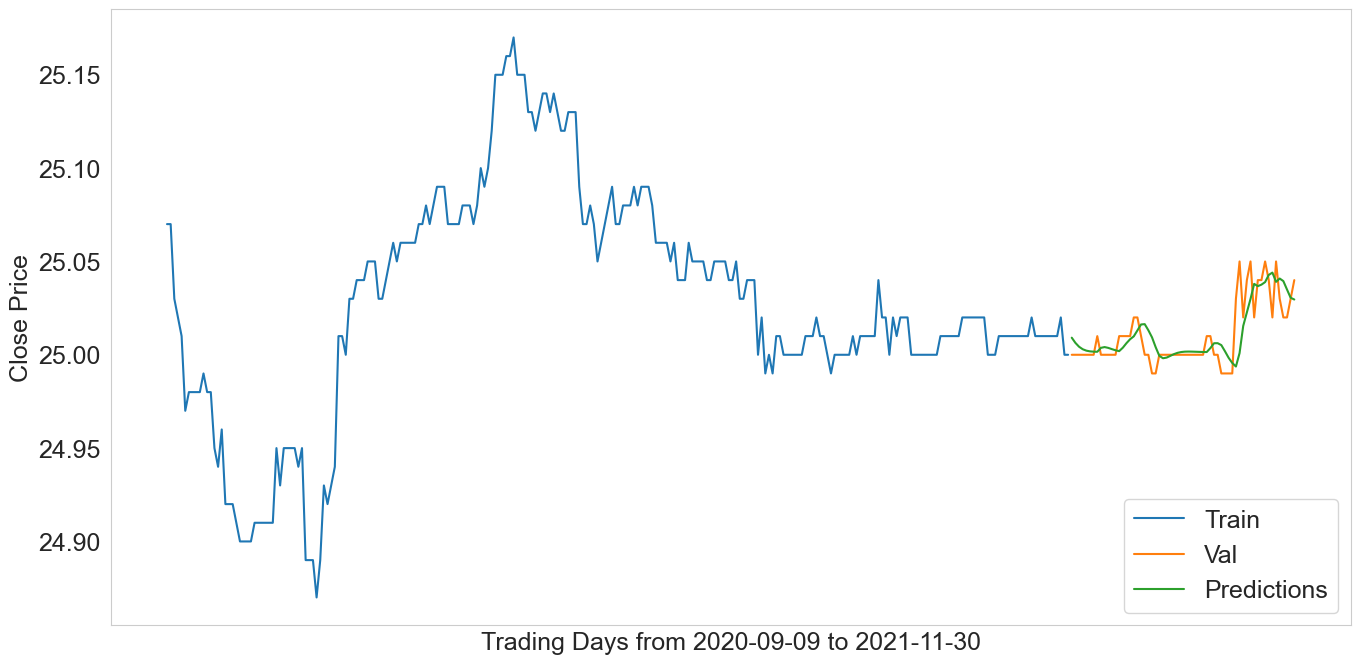

In [321]:
data = stock_data.filter(['close'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predictions
SMALL_SIZE = 18
MEDIUM_SIZE = 18
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) 
plt.figure(figsize=(16,8))
plt.xticks([])
plt.title('')
plt.grid(b=None)
plt.xlabel('Trading Days from 2020-09-09 to 2021-11-30')
plt.ylabel('Close Price')
plt.plot(train)
plt.plot(validation[['close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.savefig('LSTM val.pdf', format="pdf", bbox_inches="tight")
plt.show()


[[25.009155]
 [25.006376]
 [25.00431 ]
 [25.002975]
 [25.002213]
 [25.001831]
 [25.001667]
 [25.001608]
 [25.00372 ]
 [25.00413 ]
 [25.003696]
 [25.003025]
 [25.002409]
 [25.001951]
 [25.003792]
 [25.006224]
 [25.008343]
 [25.009865]
 [25.013056]
 [25.016245]
 [25.016409]
 [25.013134]
 [25.009335]
 [25.004095]
 [24.999462]
 [24.998138]
 [24.998486]
 [24.999409]
 [25.00034 ]
 [25.00104 ]
 [25.001469]
 [25.00167 ]
 [25.00172 ]
 [25.001684]
 [25.001617]
 [25.001549]
 [25.001497]
 [25.001467]
 [25.003588]
 [25.006186]
 [25.00621 ]
 [25.005177]
 [25.001873]
 [24.998388]
 [24.99561 ]
 [24.99371 ]
 [25.000898]
 [25.015451]
 [25.022692]
 [25.029917]
 [25.037975]
 [25.036768]
 [25.037575]
 [25.038937]
 [25.042778]
 [25.044024]
 [25.039076]
 [25.040846]
 [25.039474]
 [25.034975]
 [25.030544]
 [25.029606]]
Buy price and date
            Predictions
Unnamed: 0             
2022-01-14     24.99371
Sell price and date
            Predictions
Unnamed: 0             
2022-01-24    25.044024


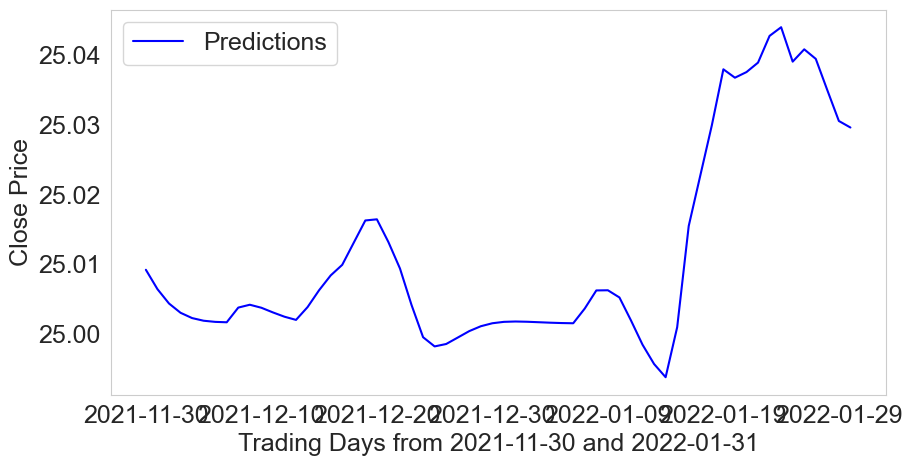

In [322]:
print(predictions)
predictions = pd.DataFrame({"Predictions": predictions.T[0]},index=pd.date_range(start=df.index[-1], periods=len(predict), freq="D"))


predictions.to_csv("Predicted-price-data.csv")
#colllects future days from predicted values
oneyear_df = pd.DataFrame(predictions[:252])
oneyear_df.to_csv("one-year-predictions.csv")
twomonth_df = pd.DataFrame(predictions[:42])
twomonth_df.to_csv("two-month-predictions.csv")
fivedays_df = pd.DataFrame(predictions[:5])
fivedays_df.to_csv("five-days-predictions.csv")

oneyear_df_pred = pd.read_csv("one-year-predictions.csv")
oneyear_df_pred.head()
oneyear_df_pred.set_index("Unnamed: 0", inplace=True)
buy_price = min(oneyear_df_pred["Predictions"])
sell_price = max(oneyear_df_pred["Predictions"])
oneyear_buy = oneyear_df_pred.loc[oneyear_df_pred["Predictions"] == buy_price]
oneyear_sell = oneyear_df_pred.loc[oneyear_df_pred["Predictions"] == sell_price]
print("Buy price and date")
print(oneyear_buy)
print("Sell price and date")
print(oneyear_sell)
oneyear_df_pred["Predictions"].plot(figsize=(10, 5), title="Forecast for the next 2 months", color="blue")
#plt.xticks([])
plt.title('')
plt.xlabel('Trading Days from 2021-11-30 and 2022-01-31')
plt.grid(b=None)
plt.ylabel('Close Price')
plt.legend()
plt.savefig('LSTM pred.pdf', format="pdf", bbox_inches="tight")
plt.show()

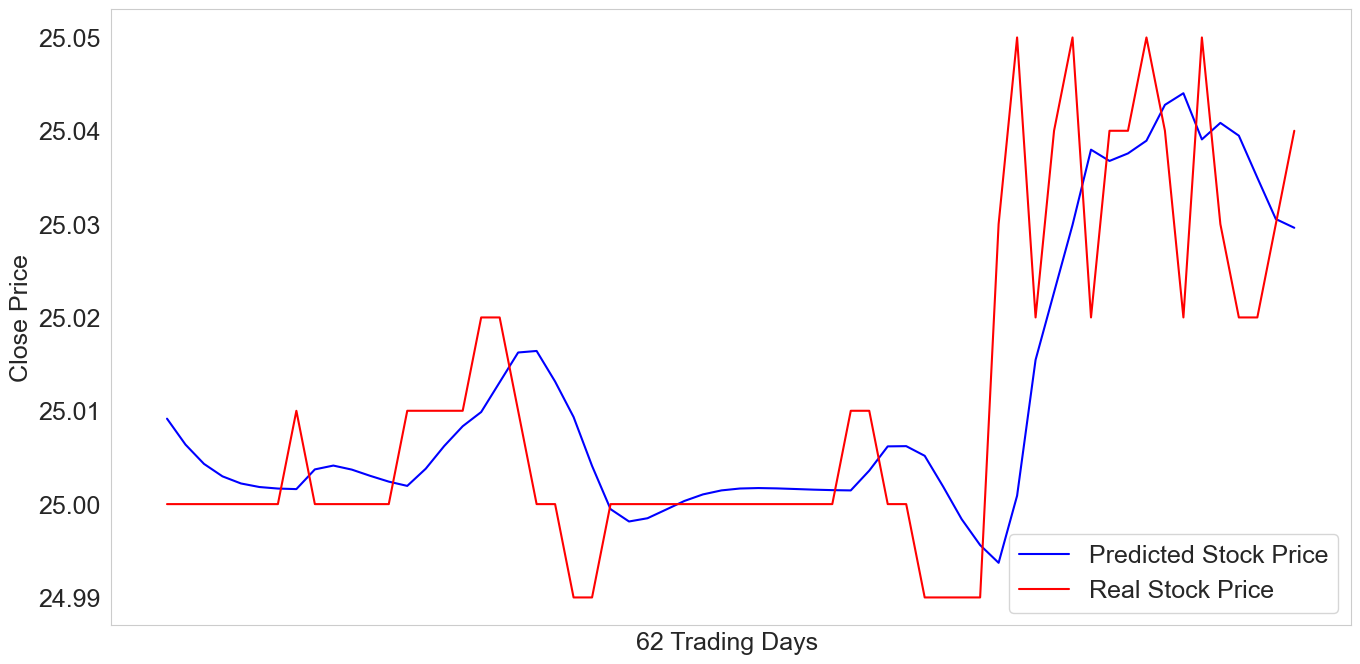

In [323]:
plt.figure(figsize=(16,8))
test_label = y_test.reshape(-1,1)
predicted = np.array(predictions).reshape(-1,1)
len_t = len(x_test)
plt.axes().set_facecolor("white")
'''for j in range(len_t , len_t + len(x_test)):
    temp = stock_data.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp'''
plt.plot(predicted, color = 'blue', label = 'Predicted Stock Price')
plt.plot(test_label, color = 'red', label = 'Real Stock Price')
plt.title(' Stock Price Prediction')
plt.xticks([])
#plt.text(45, 20, "Confidence Interval\n(25.01, 25.01)", fontsize=12)
plt.title('')
plt.xlabel('62 Trading Days ')
plt.ylabel('Close Price')
plt.grid(b=None)
plt.legend()
plt.legend(frameon = 1).get_frame().set_facecolor('white')
plt.legend(loc='lower right')
plt.savefig('AAA lstm train.pdf', format="pdf", bbox_inches="tight")
plt.show()


In [324]:
import numpy as np 
from scipy.stats import t
x = predicted
m = x.mean() 
s = x.std() 
dof = len(x)-1 
confidence = 0.95
t_crit=np.abs(t.ppf((1-confidence)/2,dof))
print((m-s*t_crit/np.sqrt(len(x)), m+s*t_crit/np.sqrt(len(x)))) 

(25.00749761436743, 25.014810735241944)


# MLP

In [325]:
df = pd.read_csv("data.csv")
df=df[df['fund_symbol']=='AAA']
df.set_index("price_date", inplace=True)
df.head()

,fund_symbol,open,high,low,close,adj_close,volume
price_date,,,,,,,
2020-09-09,AAA,25.10,25.12,25.07,25.07,24.85,17300
2020-09-10,AAA,25.06,25.07,25.05,25.07,24.85,23500
2020-09-11,AAA,25.04,25.05,25.02,25.03,24.81,33400
2020-09-14,AAA,25.01,25.06,25.01,25.02,24.80,13100
2020-09-15,AAA,25.02,25.03,25.01,25.01,24.79,12100


In [326]:
df2=df.drop(columns=['fund_symbol'])

df2["Diff"] = df2.close.diff()
df2["SMA_2"] = df2.close.rolling(2).mean()
df2["Force_Index"] = df2["close"] * df2["volume"]
df2["y"] = df2["Diff"].apply(lambda x: 1 if x > 0 else 0).shift(-1)
df2 = df2.drop(
   ["open", "high", "low", "close", "volume", "Diff", "adj_close"],
   axis=1,
).dropna()
# print(df)
X = df.adj_close
y = df.iloc[:, 4]
X = df2.drop(["y"], axis=1).values

#X = StandardScaler().fit_transform(X)

y = df2["y"].values
X_train, X_test, y_train, y_test = train_test_split(
   X,
   y,
   test_size=0.2,
   shuffle=True,
)
#print((y_train.reshape(-1,1)).shape)
clf = make_pipeline(MinMaxScaler(), MLPClassifier(random_state=0, shuffle=True))
#clf.fit(X_train.reshape(-1,1),y_train.reshape(-1,1))
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
print(y_pred)
print(accuracy_score(y_test, y_pred))


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0.7258064516129032


In [327]:
'''rmse = np.sqrt(np.mean(y_pred - y_test)**2)
mae_score=mae(y_test, y_pred)
quan=quantile_score (y_test,y_pred)
smape=0
fore=np.mean(y_test-y_pred)

df_Metrics = df_Metrics[df_Metrics.model != "MLP"]
var = explained_variance_score(y_test.reshape(-1,1), y_pred)

r2 = r2_score(y_test.reshape(-1,1), y_pred)


var2 = max_error(y_test.reshape(-1,1),y_pred)


mape=mean_absolute_percentage_error(y_test.reshape(-1,1), y_pred)
df_Metrics=df_Metrics.append({'model': 'MLP',
                   'MAE': mae_score,
                   'RMSE':rmse,'R^2':r2,
                    'explained_variance_score':var,
                   'FORECAST ERROR':fore,
                    'QUANTILE ERROR':quan,
                    'MAPE':mape,
                   'MAX ERROR':var2
                  }, ignore_index=True)'''

'rmse = np.sqrt(np.mean(y_pred - y_test)**2)\nmae_score=mae(y_test, y_pred)\nquan=quantile_score (y_test,y_pred)\nsmape=0\nfore=np.mean(y_test-y_pred)\n\ndf_Metrics = df_Metrics[df_Metrics.model != "MLP"]\nvar = explained_variance_score(y_test.reshape(-1,1), y_pred)\n\nr2 = r2_score(y_test.reshape(-1,1), y_pred)\n\n\nvar2 = max_error(y_test.reshape(-1,1),y_pred)\n\n\nmape=mean_absolute_percentage_error(y_test.reshape(-1,1), y_pred)\ndf_Metrics=df_Metrics.append({\'model\': \'MLP\',\n                   \'MAE\': mae_score,\n                   \'RMSE\':rmse,\'R^2\':r2,\n                    \'explained_variance_score\':var,\n                   \'FORECAST ERROR\':fore,\n                    \'QUANTILE ERROR\':quan,\n                    \'MAPE\':mape,\n                   \'MAX ERROR\':var2\n                  }, ignore_index=True)'

In [328]:
from statistics import mean
mae_score=mean(qj(y_test.reshape(-1,1), y_pred ,y_train.reshape(-1,1)))
rmse=(mean(qj2(y_test.reshape(-1,1), y_pred ,y_train.reshape(-1,1))))**0.5
#rmse = np.sqrt(np.mean(predict - y_test)**2)
#mae_score=mae(y_test, predict)
#smape=0
#fore=np.mean(y_test-predict)
#quan= quantile_score (y_test,predict)
df_Metrics = df_Metrics[df_Metrics.model != "MLP"]
#var = explained_variance_score(y_test.reshape(-1,1), predict)

#r2 = r2_score(y_test.reshape(-1,1), predict)


#var2 = max_error(y_test.reshape(-1,1),predict)

#mape=mean_absolute_percentage_error(y_test.reshape(-1,1), predict)

df_Metrics=df_Metrics.append({'model': 'MLP',
                   'MASE': mae_score,
                   'RMSSE':rmse
                  }, ignore_index=True)
#metrics={'RF', mae, rsme,smape,fore,quan,precision,recall,f1,roc,accuracy}
#df_Metrics.insert('RF', mae, rsme,smape,fore,quan,precision,recall,f1,roc,accuracy)

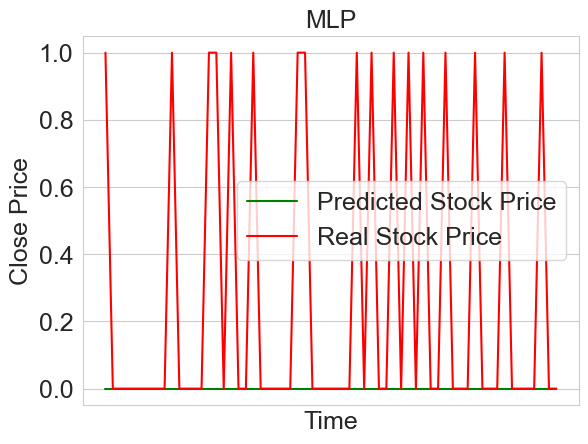

In [329]:
predicted=y_pred.reshape(-1,1)
test_label = y_test.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(X_test)
plt.axes().set_facecolor("white")
#for j in range(len_t , len_t + len(X_test)):
#    temp = df.iloc[j,3]
#    test_label[j - len_t] = test_label[j - len_t] * temp + temp
#    predicted[j - len_t] = predicted[j - len_t] * temp + temp
plt.plot(predicted, color = 'green', label = 'Predicted Stock Price')
plt.plot(test_label, color = 'red', label = 'Real Stock Price')
plt.title(' Stock Price Prediction')
plt.xticks([])

plt.title('MLP')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.legend(frameon = 1).get_frame().set_facecolor('white')
plt.savefig('MLP.png')
plt.show()


In [330]:
df_Metrics.head()

,model,MASE,RMSSE
0,RF,0.001349,0.001053
1,LSTM,0.005792,0.003555
2,MLP,0.738213,0.449904


In [331]:
print(predictions.mean())
print(y_test.mean())
print(stats.ttest_rel(a=y_test,b= y_pred))
print(np.array(stats.ttest_rel(a=y_test.reshape(-1,1),b= y_pred)[1]).mean())

import numpy as np 
from scipy.stats import t
x = y_pred
m = x.mean() 
s = x.std() 
dof = len(x)-1 
confidence = 0.95
t_crit=np.abs(t.ppf((1-confidence)/2,dof))
print((m-s*t_crit/np.sqrt(len(x)), m+s*t_crit/np.sqrt(len(x)))) 

Predictions    25.01115
dtype: float32
0.27419354838709675
Ttest_relResult(statistic=4.8004629406385835, pvalue=1.0636928595328033e-05)
1.0636928595328059e-05
(0.0, 0.0)


# SVM 

In [332]:
df = pd.read_csv("data.csv")
df=df[df['fund_symbol']=='AAA']
df.set_index("price_date", inplace=True)
df.head()

,fund_symbol,open,high,low,close,adj_close,volume
price_date,,,,,,,
2020-09-09,AAA,25.10,25.12,25.07,25.07,24.85,17300
2020-09-10,AAA,25.06,25.07,25.05,25.07,24.85,23500
2020-09-11,AAA,25.04,25.05,25.02,25.03,24.81,33400
2020-09-14,AAA,25.01,25.06,25.01,25.02,24.80,13100
2020-09-15,AAA,25.02,25.03,25.01,25.01,24.79,12100


In [333]:
df['Open-Close'] = df.open - df.close
df['High-Low'] = df.high - df.low
  

# Store all predictor variables in a variable X
X = df[['Open-Close', 'High-Low']]
#X= pd.DataFrame(df['adj_close'])
print(X)
X.head()

            Open-Close  High-Low
price_date                      
2020-09-09        0.03      0.05
2020-09-10       -0.01      0.02
2020-09-11        0.01      0.03
2020-09-14       -0.01      0.05
2020-09-15        0.01      0.02
...                ...       ...
2021-11-23        0.01      0.02
2021-11-24        0.01      0.02
2021-11-26        0.02      0.02
2021-11-29       -0.01      0.01
2021-11-30        0.00      0.00

[310 rows x 2 columns]


,Open-Close,High-Low
price_date,,
2020-09-09,0.03,0.05
2020-09-10,-0.01,0.02
2020-09-11,0.01,0.03
2020-09-14,-0.01,0.05
2020-09-15,0.01,0.02


In [334]:
y = np.where(df['close'].shift(-1) > df['close'], 1, 0)
print(y)

[0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1
 0 0 0 0 1 1 0 1 1 1 0 0 1 0 1 0 0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 1 0 1 1
 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0
 0 0 0 0 1 0 0 1 1 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0
 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1
 1 0 1 0 1 0 0 1 0 0 0 1 1 0]


In [335]:
split_percentage = 0.8
split = int(split_percentage*len(df))
  
# Train data set
X_train = X[:split]
y_train = y[:split]
  
# Test data set
X_test = X[split:]
y_test = y[split:]

#scale = MinMaxScaler()
#X_train = scale.fit_transform(X_train)
#X_test = scale.fit_transform(X_test)

In [336]:
#cls = SVC().fit(X_train, y_train)
svr = SVC(C=1e3, gamma=0.2)

# Train the model 
svr.fit(X_train, y_train)
svm_confidence = svr.score(X_test, y_test)
print('svm confidence:', svm_confidence)

svm confidence: 0.7741935483870968


In [337]:
'''y_pred = svr.predict(X_test)
quan= quantile_score (y_test,y_pred)
rmse = np.sqrt(np.mean(y_pred - y_test)**2)
mae_score=mae(y_test, y_pred)
smape=0
fore=np.mean(y_test-y_pred)
df_Metrics = df_Metrics[df_Metrics.model != "SVM"]
var = explained_variance_score(y_test.reshape(-1,1), y_pred)

r2 = r2_score(y_test.reshape(-1,1), y_pred)


var2 = max_error(y_test.reshape(-1,1), y_pred)


mape=mean_absolute_percentage_error(y_test.reshape(-1,1), y_pred)

df_Metrics=df_Metrics.append({'model': 'SVM',
                   'MAE': mae_score,
                   'RMSE':rmse,'R^2':r2,
                    'explained_variance_score':var,
                   'FORECAST ERROR':fore,
                    'MAPE':mape,
                    'QUANTILE ERROR':quan,
                   'MAX ERROR':var2
                  }, ignore_index=True)

'''

'y_pred = svr.predict(X_test)\nquan= quantile_score (y_test,y_pred)\nrmse = np.sqrt(np.mean(y_pred - y_test)**2)\nmae_score=mae(y_test, y_pred)\nsmape=0\nfore=np.mean(y_test-y_pred)\ndf_Metrics = df_Metrics[df_Metrics.model != "SVM"]\nvar = explained_variance_score(y_test.reshape(-1,1), y_pred)\n\nr2 = r2_score(y_test.reshape(-1,1), y_pred)\n\n\nvar2 = max_error(y_test.reshape(-1,1), y_pred)\n\n\nmape=mean_absolute_percentage_error(y_test.reshape(-1,1), y_pred)\n\ndf_Metrics=df_Metrics.append({\'model\': \'SVM\',\n                   \'MAE\': mae_score,\n                   \'RMSE\':rmse,\'R^2\':r2,\n                    \'explained_variance_score\':var,\n                   \'FORECAST ERROR\':fore,\n                    \'MAPE\':mape,\n                    \'QUANTILE ERROR\':quan,\n                   \'MAX ERROR\':var2\n                  }, ignore_index=True)\n\n'

In [338]:
from statistics import mean
mae_score=mean(qj(y_test.reshape(-1,1), y_pred ,y_train.reshape(-1,1)))
rmse=(mean(qj2(y_test.reshape(-1,1), y_pred ,y_train.reshape(-1,1))))**0.5
#rmse = np.sqrt(np.mean(predict - y_test)**2)
#mae_score=mae(y_test, predict)
#smape=0
#fore=np.mean(y_test-predict)
#quan= quantile_score (y_test,predict)
df_Metrics = df_Metrics[df_Metrics.model != "SVM"]
#var = explained_variance_score(y_test.reshape(-1,1), predict)

#r2 = r2_score(y_test.reshape(-1,1), predict)


#var2 = max_error(y_test.reshape(-1,1),predict)

#mape=mean_absolute_percentage_error(y_test.reshape(-1,1), predict)

df_Metrics=df_Metrics.append({'model': 'SVM',
                   'MASE': mae_score,
                   'RMSSE':rmse
                  }, ignore_index=True)
#metrics={'RF', mae, rsme,smape,fore,quan,precision,recall,f1,roc,accuracy}
#df_Metrics.insert('RF', mae, rsme,smape,fore,quan,precision,recall,f1,roc,accuracy)

In [339]:
df_Metrics.head()

,model,MASE,RMSSE
0,RF,0.001349,0.001053
1,LSTM,0.005792,0.003555
2,MLP,0.738213,0.449904
3,SVM,0.546806,0.351386


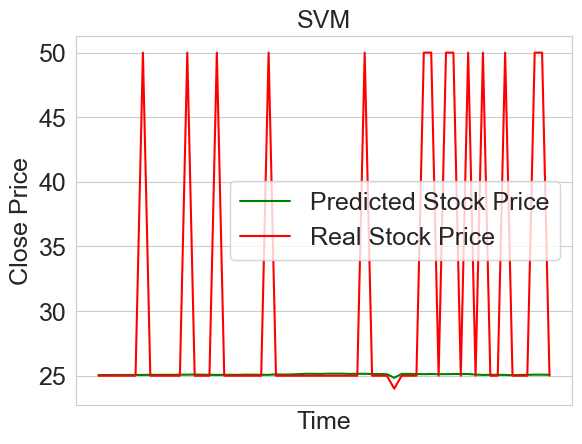

In [340]:
predicted=y_pred.reshape(-1,1)
test_label = y_test.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(X_test)
plt.axes().set_facecolor("white")
for j in range(len_t , len_t + len(X_test)):
    temp = df.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp
plt.plot(predicted, color = 'green', label = 'Predicted Stock Price')
plt.plot(test_label, color = 'red', label = 'Real Stock Price')
plt.title(' Stock Price Prediction')
plt.xticks([])

plt.title('SVM')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.legend(frameon = 1).get_frame().set_facecolor('white')
plt.savefig('SVM.png')
plt.show()


In [341]:
print(predictions.mean())
print(y_test.mean())
print(stats.ttest_rel(a=y_test,b= y_pred))
print(np.array(stats.ttest_rel(a=y_test.reshape(-1,1),b= y_pred)[1]).mean())

import numpy as np 
from scipy.stats import t
x = predicted
m = x.mean() 
s = x.std() 
dof = len(x)-1 
confidence = 0.95
t_crit=np.abs(t.ppf((1-confidence)/2,dof))
print((m-s*t_crit/np.sqrt(len(x)), m+s*t_crit/np.sqrt(len(x)))) 

Predictions    25.01115
dtype: float32
30.629032258064516
Ttest_relResult(statistic=22.86504934358853, pvalue=1.2939746040282138e-31)
1.2939746040282143e-31
(25.079849464929588, 25.103698922167176)


# CNN

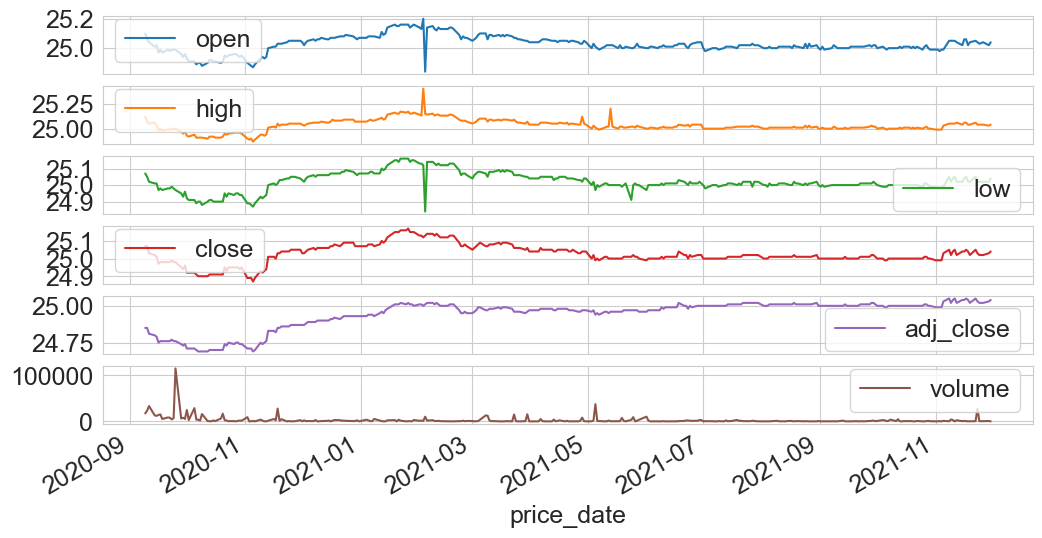

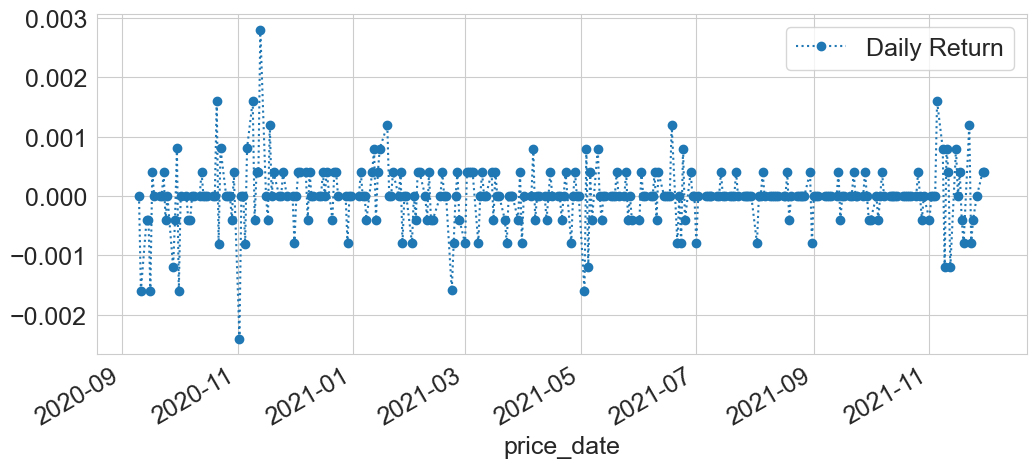

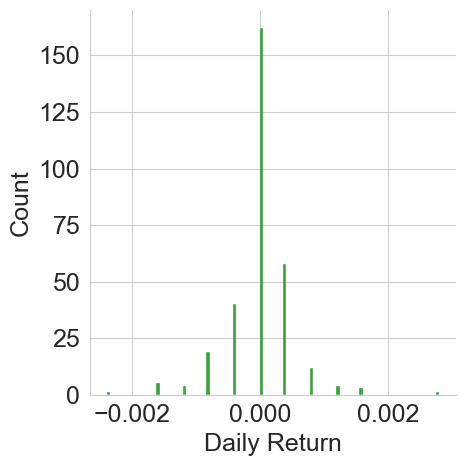

     price_date   open   high    low  close  adj_close  volume  \
0    2020-09-09  25.10  25.12  25.07  25.07      24.85   17300   
1    2020-09-10  25.06  25.07  25.05  25.07      24.85   23500   
2    2020-09-11  25.04  25.05  25.02  25.03      24.81   33400   
3    2020-09-14  25.01  25.06  25.01  25.02      24.80   13100   
4    2020-09-15  25.02  25.03  25.01  25.01      24.79   12100   
..          ...    ...    ...    ...    ...        ...     ...   
305  2021-11-23  25.04  25.04  25.02  25.03      25.03   27800   
306  2021-11-24  25.03  25.04  25.02  25.02      25.02     500   
307  2021-11-26  25.04  25.04  25.02  25.02      25.02     500   
308  2021-11-29  25.02  25.03  25.02  25.03      25.03     900   
309  2021-11-30  25.04  25.04  25.04  25.04      25.04     100   

     MA for 10 days  MA for 50 days  MA for 100 days  Daily Return  
0         25.023977       25.030638        25.037515     -0.000004  
1         25.023977       25.030638        25.037515      0.000000  


price_date         0
open               0
high               0
low                0
close              0
adj_close          0
volume             0
MA for 10 days     0
MA for 50 days     0
MA for 100 days    0
Daily Return       0
dtype: int64

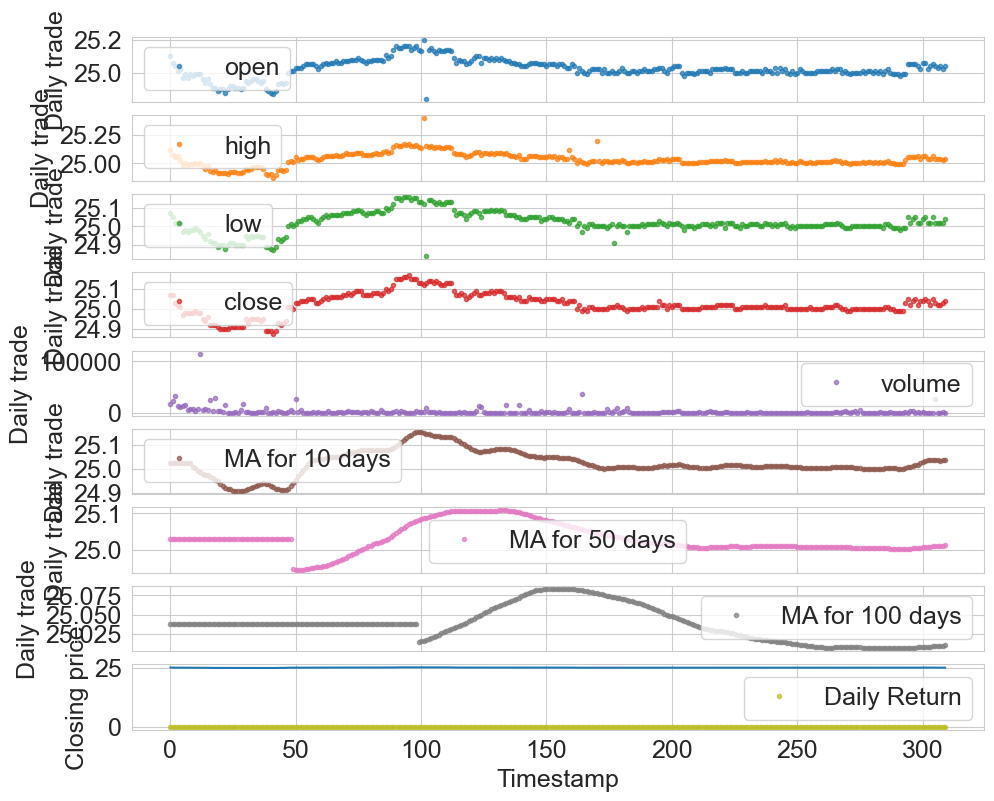

In [342]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
from datetime import datetime    
sns.set_style("whitegrid")
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
%matplotlib inline
#plt.style.use("ggplot")

df = pd.read_csv('data.csv')
# Changes The Date column as index columns
df.index = pd.to_datetime(df['price_date'])

  
# drop The original date column
#df = df.drop(['price_date'], axis='columns')
df=df[df['fund_symbol']=='AAA']
df = df.drop(['fund_symbol'], axis='columns')
data= df
data.plot(legend=True,subplots=True, figsize = (12, 6))
plt.show()
#data['Close'].plot(legend=True, figsize = (12, 6))
#plt.show()
#data['Volume'].plot(legend=True,figsize=(12,7))
#plt.show()

data.shape
data.size
data.describe(include='all').T
data.dtypes
data.nunique()
ma_day = [10,50,100]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    data[column_name]=pd.DataFrame.rolling(data['close'],ma).mean()

data['Daily Return'] = data['close'].pct_change()
# plot the daily return percentage
data['Daily Return'].plot(figsize=(12,5),legend=True,linestyle=':',marker='o')
plt.show()

sns.displot(data['Daily Return'].dropna(),bins=100,color='green')
plt.show()

date=pd.DataFrame(data['price_date'])
closing_df1 = pd.DataFrame(data['close'])
close1  = closing_df1.rename(columns={"close": "data_close"})
close2=pd.concat([date,close1],axis=1)
close2.head()

data.reset_index(drop=True, inplace=True)
data.fillna(data.mean(), inplace=True)
data.head()

data.nunique()

data.sort_index(axis=1,ascending=True)

cols_plot = ['open', 'high', 'low','close','volume','MA for 10 days','MA for 50 days','MA for 100 days','Daily Return']
axes = data[cols_plot].plot(marker='.', alpha=0.7, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

plt.plot(data['close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)

data.isnull().sum()

In [343]:
from sklearn.model_selection import train_test_split

X = []
Y = []
window_size=100
for i in range(1 , len(df) - window_size -1 , 1):
    first = df.iloc[i,2]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df.iloc[i + j, 2] - first) / first)
    temp2.append((df.iloc[i + window_size, 2] - first) / first)
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

print(len(train_X))
print(len(test_X))

166
42


In [344]:
# For creating model and training
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed
from tensorflow.keras.layers import MaxPooling1D, Flatten
from tensorflow.keras.regularizers import L1, L2
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.metrics import RootMeanSquaredError

model = tf.keras.Sequential()

# Creating the Neural Network model here...
# CNN layers
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu', input_shape=(None, 100, 1))))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(128, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Flatten()))
# model.add(Dense(5, kernel_regularizer=L2(0.01)))

# LSTM layers
#model.add(Bidirectional(LSTM(100, return_sequences=True)))
#model.add(Dropout(0.5))
#model.add(Bidirectional(LSTM(100, return_sequences=False)))
#model.add(Dropout(0.5))

#Final layers
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])

history = model.fit(train_X, train_Y, validation_data=(test_X,test_Y), epochs=40,batch_size=40, verbose=1, shuffle =True)

Epoch 1/40
5/5 [==============================] - 1s 74ms/step - loss: 1.8967e-05 - mse: 1.8967e-05 - mae: 0.0036 - val_loss: 8.0543e-06 - val_mse: 8.0543e-06 - val_mae: 0.0022
Epoch 2/40
5/5 [==============================] - 0s 21ms/step - loss: 1.1072e-05 - mse: 1.1072e-05 - mae: 0.0025 - val_loss: 7.2373e-06 - val_mse: 7.2373e-06 - val_mae: 0.0023
Epoch 3/40
5/5 [==============================] - 0s 18ms/step - loss: 7.7253e-06 - mse: 7.7253e-06 - mae: 0.0021 - val_loss: 5.7845e-06 - val_mse: 5.7845e-06 - val_mae: 0.0021
Epoch 4/40
5/5 [==============================] - 0s 21ms/step - loss: 5.4420e-06 - mse: 5.4420e-06 - mae: 0.0018 - val_loss: 1.8483e-06 - val_mse: 1.8483e-06 - val_mae: 0.0010
Epoch 5/40
5/5 [==============================] - 0s 23ms/step - loss: 3.3997e-06 - mse: 3.3997e-06 - mae: 0.0012 - val_loss: 1.4983e-06 - val_mse: 1.4983e-06 - val_mae: 9.1998e-04
Epoch 6/40
5/5 [==============================] - 0s 26ms/step - loss: 3.0818e-06 - mse: 3.0818e-06 - mae: 0.00

In [345]:
# predict probabilities for test set
yhat_probs = model.predict(test_X, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
print(yhat_probs.shape)

(42, 1)


In [346]:
from statistics import mean
mae_score=mean(qj(test_Y.reshape(-1,1), yhat_probs ,train_Y.reshape(-1,1)))
rmse=(mean(qj2(test_Y.reshape(-1,1), yhat_probs ,train_Y.reshape(-1,1))))**0.5
#rmse = np.sqrt(np.mean(predict - y_test)**2)
#mae_score=mae(y_test, predict)
#smape=0
#fore=np.mean(y_test-predict)
#quan= quantile_score (y_test,predict)
df_Metrics = df_Metrics[df_Metrics.model != "CNN"]
#var = explained_variance_score(y_test.reshape(-1,1), predict)

#r2 = r2_score(y_test.reshape(-1,1), predict)


#var2 = max_error(y_test.reshape(-1,1),predict)

#mape=mean_absolute_percentage_error(y_test.reshape(-1,1), predict)

df_Metrics=df_Metrics.append({'model': 'CNN',
                   'MASE': mae_score,
                   'RMSSE':rmse
                  }, ignore_index=True)
#metrics={'RF', mae, rsme,smape,fore,quan,precision,recall,f1,roc,accuracy}
#df_Metrics.insert('RF', mae, rsme,smape,fore,quan,precision,recall,f1,roc,accuracy)

In [347]:

'''var = explained_variance_score(test_Y.reshape(-1,1), yhat_probs)

r2 = r2_score(test_Y.reshape(-1,1), yhat_probs)


var2 = max_error(test_Y.reshape(-1,1), yhat_probs)

rmse = np.sqrt(np.mean(yhat_probs - test_Y)**2)
mae_score=mae(test_Y.reshape(-1,1), yhat_probs)
quan=(quantile_score(test_Y,yhat_probs))
fore=np.mean(test_Y.reshape(-1,1)- yhat_probs)

df_Metrics = df_Metrics[df_Metrics.model != "CNN"]

var = explained_variance_score(test_Y.reshape(-1,1), yhat_probs)

r2 = r2_score(test_Y.reshape(-1,1), yhat_probs)


var2 = max_error(test_Y.reshape(-1,1), yhat_probs)

mape=mean_absolute_percentage_error( yhat_probs,test_Y.reshape(-1,1))
df_Metrics=df_Metrics.append({'model': 'CNN',
                   'MAE': mae_score,
                   'RMSE':rmse,'R^2':r2,
                    'explained_variance_score':var,
                   'FORECAST ERROR':fore,
                    'QUANTILE ERROR':quan,
                    'MAPE':mape,
                   'MAX ERROR':var2
                  }, ignore_index=True)

df_Metrics.head()'''

'var = explained_variance_score(test_Y.reshape(-1,1), yhat_probs)\n\nr2 = r2_score(test_Y.reshape(-1,1), yhat_probs)\n\n\nvar2 = max_error(test_Y.reshape(-1,1), yhat_probs)\n\nrmse = np.sqrt(np.mean(yhat_probs - test_Y)**2)\nmae_score=mae(test_Y.reshape(-1,1), yhat_probs)\nquan=(quantile_score(test_Y,yhat_probs))\nfore=np.mean(test_Y.reshape(-1,1)- yhat_probs)\n\ndf_Metrics = df_Metrics[df_Metrics.model != "CNN"]\n\nvar = explained_variance_score(test_Y.reshape(-1,1), yhat_probs)\n\nr2 = r2_score(test_Y.reshape(-1,1), yhat_probs)\n\n\nvar2 = max_error(test_Y.reshape(-1,1), yhat_probs)\n\nmape=mean_absolute_percentage_error( yhat_probs,test_Y.reshape(-1,1))\ndf_Metrics=df_Metrics.append({\'model\': \'CNN\',\n                   \'MAE\': mae_score,\n                   \'RMSE\':rmse,\'R^2\':r2,\n                    \'explained_variance_score\':var,\n                   \'FORECAST ERROR\':fore,\n                    \'QUANTILE ERROR\':quan,\n                    \'MAPE\':mape,\n               

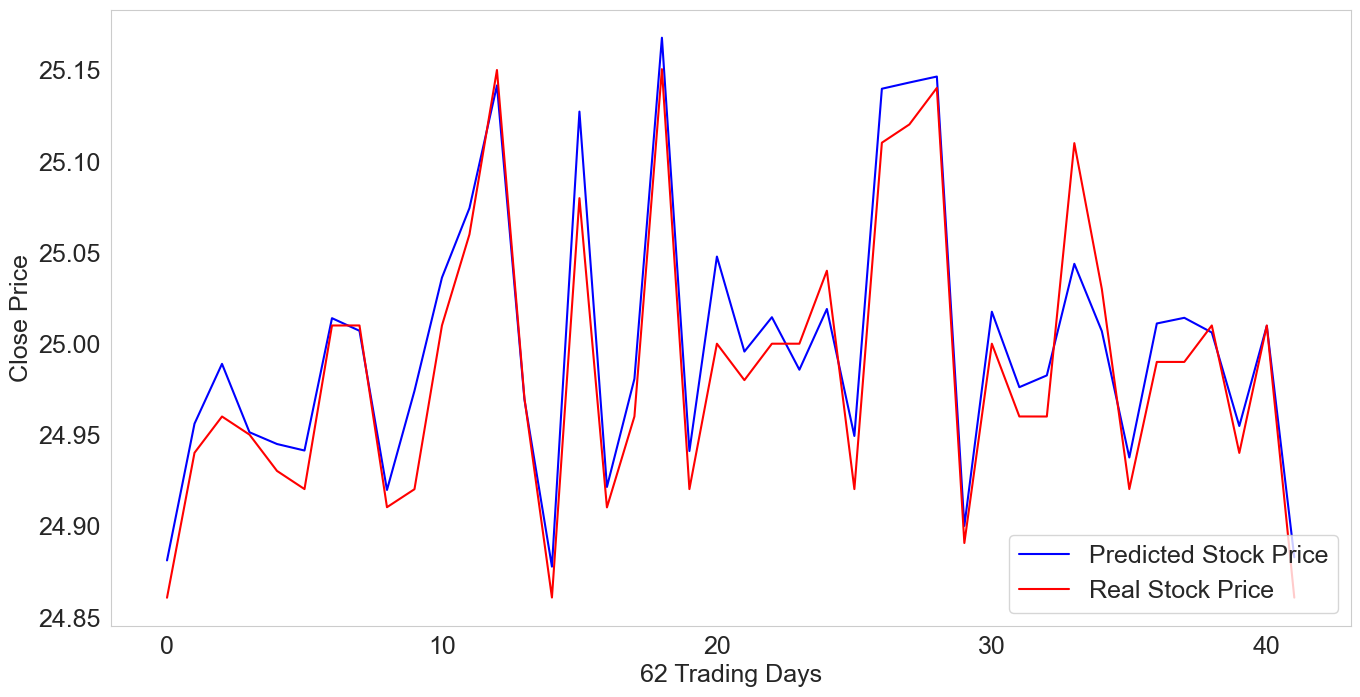

In [348]:
plt.figure(figsize=(16,8))
predicted  = yhat_probs
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted).reshape(-1,1)
len_t = len(train_X)
plt.axes().set_facecolor("white")
for j in range(len_t , len_t + len(test_X)):
    temp = data.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp
plt.plot(predicted, color = 'blue', label = 'Predicted Stock Price')
plt.plot(test_label, color = 'red', label = 'Real Stock Price')
plt.title(' Stock Price Prediction')
#plt.xticks([])
#plt.text(45,20,"Confidence Interval\n(24.99, 25.05)", fontsize=12)
plt.title('')
plt.xlabel('62 Trading Days')
plt.ylabel('Close Price')
plt.legend()
plt.legend(frameon = 1).get_frame().set_facecolor('white')
plt.legend(loc='lower right')
plt.grid(b=None)
plt.savefig('CNN train.pdf', format="pdf", bbox_inches="tight")


plt.show()


166 42 42


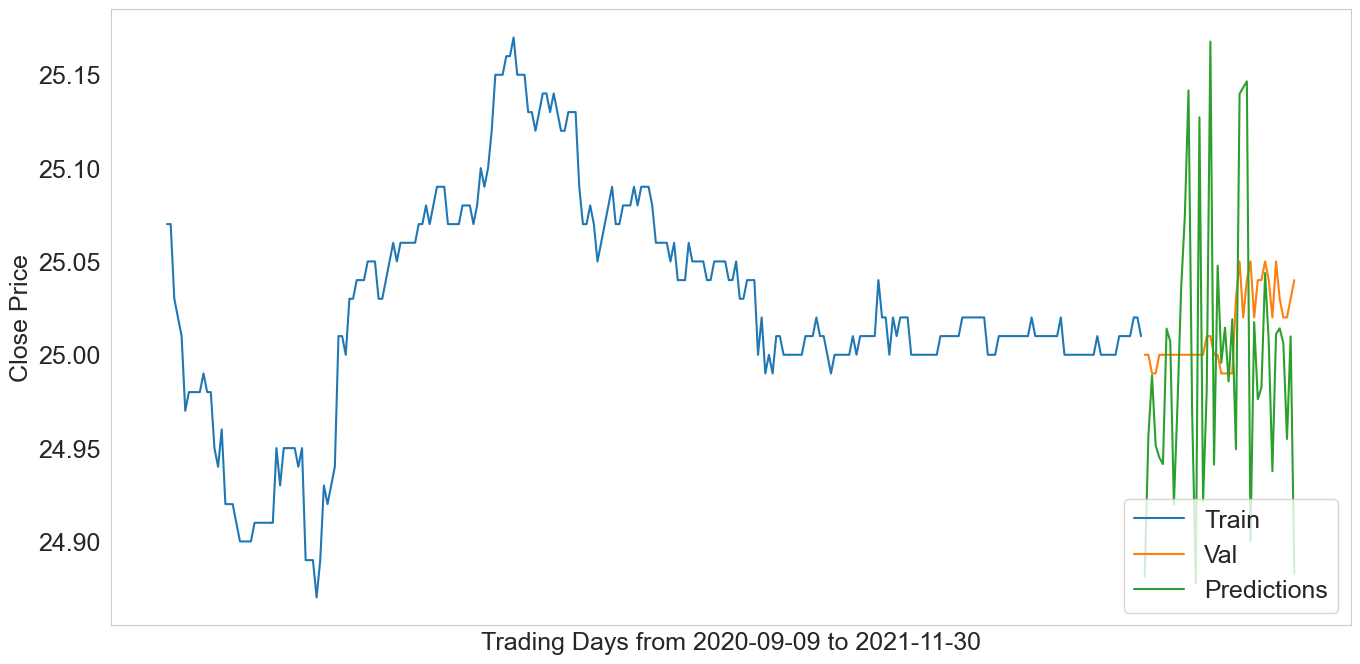

In [349]:
data = df.filter(['close'])
train = data[:268]
validation = data[268:]
print(len(train_X),len(test_X),len(yhat_probs))
validation['Predictions'] = predicted
plt.figure(figsize=(16,8))
SMALL_SIZE = 18
MEDIUM_SIZE = 18
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) 
plt.xticks([])
plt.title('')
plt.xlabel('Trading Days from 2020-09-09 to 2021-11-30')
plt.ylabel('Close Price')
plt.plot(train)
plt.plot(validation[['close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.grid(b=None)

plt.savefig('CNN val.pdf', format="pdf", bbox_inches="tight")

plt.show()

In [350]:

predictions = pd.DataFrame({"Predictions": predicted.T[0]}, index=pd.date_range(start='2021-11-30', periods=len(predicted), freq="D"))
predictions.to_csv("Predicted-price-data.csv")
#colllects future days from predicted values
oneyear_df = pd.DataFrame(predictions[:252])
oneyear_df.to_csv("one-year-predictions.csv")
twomonth_df = pd.DataFrame(predictions[:42])
twomonth_df.to_csv("two-month-predictions.csv")
fivedays_df = pd.DataFrame(predictions[:5])
fivedays_df.to_csv("five-days-predictions.csv")

oneyear_df_pred = pd.read_csv("two-month-predictions.csv")
oneyear_df_pred.head()

,Unnamed: 0,Predictions
0,2021-11-30,24.881184
1,2021-12-01,24.956150
2,2021-12-02,24.988953
3,2021-12-03,24.951445
4,2021-12-04,24.945004


In [351]:
df_Metrics.head()

,model,MASE,RMSSE
0,RF,0.001349,0.001053
1,LSTM,0.005792,0.003555
2,MLP,0.738213,0.449904
3,SVM,0.546806,0.351386
4,CNN,0.113218,0.090462


Buy price and date
            Predictions
Unnamed: 0             
2021-12-14    24.877773
Sell price and date
            Predictions
Unnamed: 0             
2021-12-18    25.167765


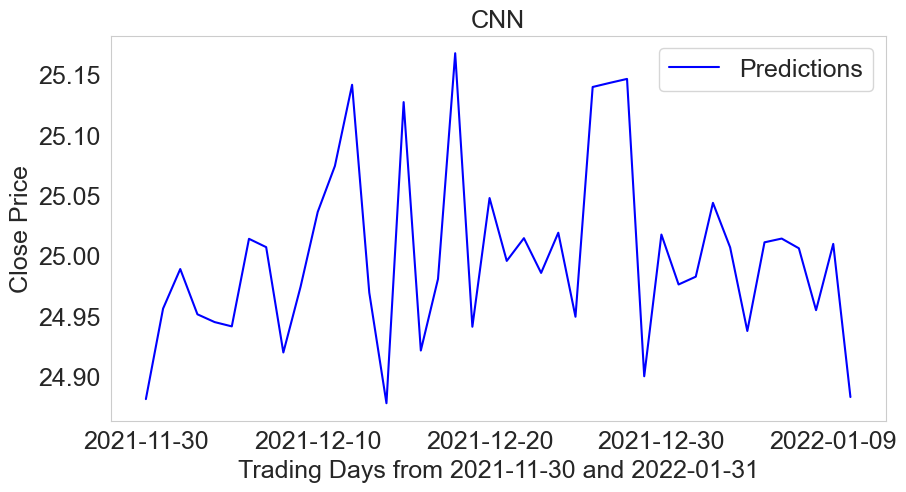

In [352]:

oneyear_df_pred.set_index("Unnamed: 0", inplace=True)
buy_price = min(oneyear_df_pred["Predictions"])
sell_price = max(oneyear_df_pred["Predictions"])
oneyear_buy = oneyear_df_pred.loc[oneyear_df_pred["Predictions"] == buy_price]
oneyear_sell = oneyear_df_pred.loc[oneyear_df_pred["Predictions"] == sell_price]
print("Buy price and date")
print(oneyear_buy)
print("Sell price and date")
print(oneyear_sell)
oneyear_df_pred["Predictions"].plot(figsize=(10, 5), title="Forecast for the next 2 months", color="blue")
#plt.xticks([])
plt.title('CNN')
plt.xlabel('Trading Days from 2021-11-30 and 2022-01-31')
plt.ylabel('Close Price')
plt.grid(b=None)
plt.legend(frameon = 1).get_frame().set_facecolor('white')
plt.legend()
plt.savefig('CNNpred.png')

plt.show()

from statistics import mean


predicted  = yhat_probs
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted).reshape(-1,1)
trainy=np.array(train_Y[:,0]).reshape(-1,1)
len_t = len(train_X)
plt.axes().set_facecolor("white")
for j in range(len_t , len_t + len(test_X)):
    temp = data.iloc[j,3]
    #test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp
    trainy[j - len_t] = predicted[j - len_t] * temp + temp
    
print(test_Y)
print(train_Y)
print(predicted)

In [353]:
import numpy as np 
from scipy.stats import t
x = predicted 
m = x.mean() 
s = x.std() 
dof = len(x)-1 
confidence = 0.95
t_crit=np.abs(t.ppf((1-confidence)/2,dof))
print((m-s*t_crit/np.sqrt(len(x)), m+s*t_crit/np.sqrt(len(x)))) 

(24.977005117568172, 25.02310550865253)


In [354]:
print(predicted.mean())
print(test_label.mean())
print(stats.ttest_rel(a=test_label,b= predicted))
print(np.array(stats.ttest_rel(a=test_label,b= predicted)[1]).mean())

25.000055
24.98731361047302
Ttest_relResult(statistic=array([-4.05900862]), pvalue=array([0.00021604]))
0.000216037819304453


In [355]:
df_Metrics.sort_values(by='MASE').head()

,model,MASE,RMSSE
0,RF,0.001349,0.001053
1,LSTM,0.005792,0.003555
4,CNN,0.113218,0.090462
3,SVM,0.546806,0.351386
2,MLP,0.738213,0.449904


In [356]:
df_Metrics.sort_values(by='RMSSE').head()

,model,MASE,RMSSE
0,RF,0.001349,0.001053
1,LSTM,0.005792,0.003555
4,CNN,0.113218,0.090462
3,SVM,0.546806,0.351386
2,MLP,0.738213,0.449904
